In [1]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

In [2]:
df = pd.read_csv('../data/video_games_sales.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Dropna

In [4]:
df = df.dropna()
df.shape

(6825, 16)

### Useful cols

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii           2006.0    Sports         82.53   
2         Mario Kart Wii      Wii           2008.0    Racing         35.52   
3      Wii Sports Resort      Wii           2009.0    Sports         32.77   
6  New Super Mario Bros.       DS           2006.0  Platform         29.80   
7               Wii Play      Wii           2006.0      Misc         28.92   

   Critic_Score  Critic_Count User_Score  User_Count Rating  
0          76.0          51.0          8       322.0      E  
2          82.0          73.0        8.3       709.0      E  
3          80.0          73.0          8       192.0      E  
6          89.0          65.0        8.5       431.0      E  
7          58.0          41.0        6.6       129.0      E

### Plot

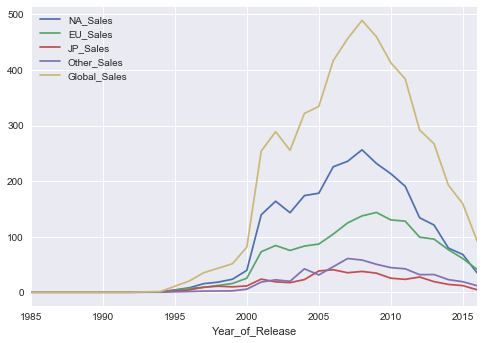

In [6]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]  
sales_df.groupby('Year_of_Release').sum().plot()

### kind

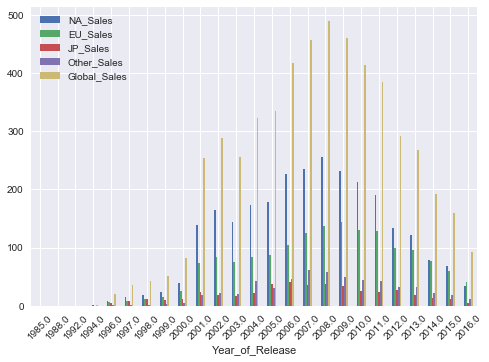

In [7]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

# Seaborn

## pairplot

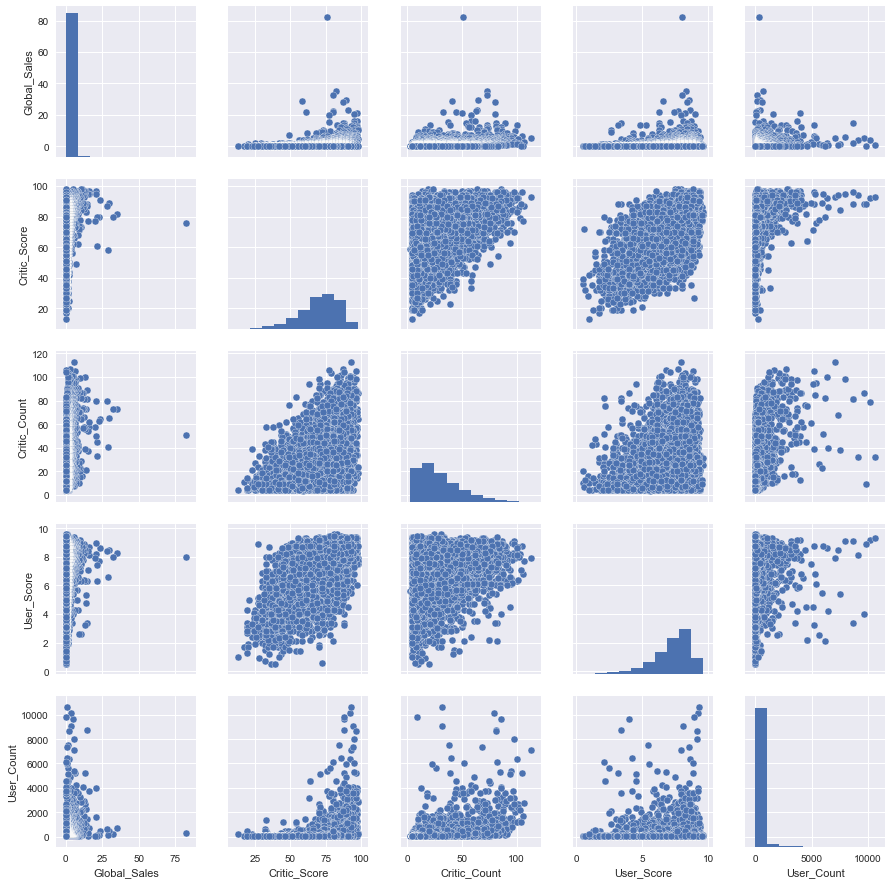

In [8]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
df['User_Score'] = df['User_Score'].astype(float64)
sns_plot = sns.pairplot(df[cols])

## Dist plot

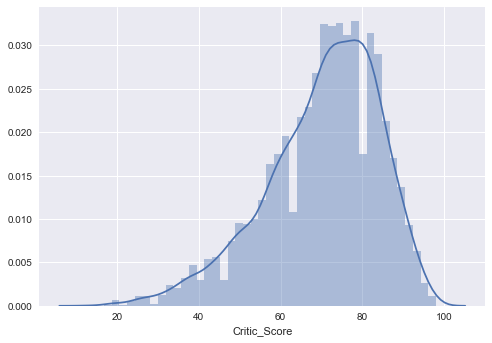

In [9]:
sns.distplot(df.Critic_Score)

## Joint plot

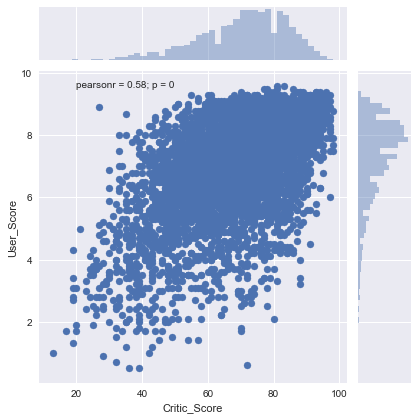

In [10]:
sns.jointplot(df.Critic_Score, df.User_Score)

## Boxplot

In [11]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

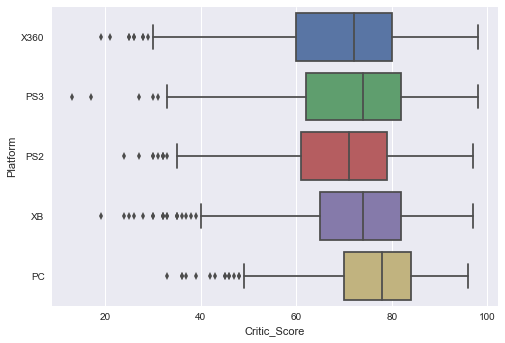

In [12]:
sns.boxplot(y='Platform', x='Critic_Score', data = df[df.Platform.isin(top_platforms)], orient='h')

## Heat map

Визуализируем суммарные продажи игр по жанрам и игровым платформам.


In [13]:
platform_genre_sales = df.pivot_table(index='Platform', 
                                      columns='Genre', 
                                      values='Global_Sales', 
                                      aggfunc=sum).applymap(float)
platform_genre_sales

Genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Platform                                                                  
3DS        30.81       2.00      2.63    4.48     27.61    2.63   13.89   
DC           NaN       1.33      0.56     NaN      0.12     NaN    0.20   
DS         42.43       8.83      3.37   68.82     55.02   50.50   29.93   
GBA        23.21       4.54      3.28    8.59     40.36    5.47   12.60   
GC         29.99       4.56     15.81   12.72     24.67    3.31   11.09   
PC         25.45       1.42      0.13    3.02      0.46    0.19    3.18   
PS         54.93       1.10     18.91    5.66     18.92    0.26   34.17   
PS2       238.73      10.74     64.72   38.70     52.34    3.97  127.17   
PS3       262.38      16.18     47.83   26.59     20.91    0.40   62.17   
PS4        76.92       3.09      6.86    2.70      6.16    0.03    9.08   
PSP        43.92       2.81     12.36    5.09     10.84    2.04   27.88   
PSV         9.53       1.28      1.91    1.81      2.49    0.12    1.00   
Wii        75.75       7.72     21.89  149.42     78.25    8.22   48.35   
WiiU       13.61       0.08      1.22   10.93     21.33    1.30    7.09   
X360      209.90      11.52     35.30   70.09     10.26    0.36   56.14   
XB         36.53       1.98     10.92    3.56      7.44    0.10   23.44   
XOne       29.07       1.57      2.25    4.08      0.62     NaN    8.84   

Genre     Role-Playing  Shooter  Simulation  Sports  Strategy  
Platform                                                       
3DS              18.94     1.02       16.08    2.20      0.94  
DC                0.68     0.05        0.52    1.09       NaN  
DS               60.31     6.40       42.71    6.01      8.00  
GBA              21.00     1.40        2.03    5.93      3.34  
GC               12.48    13.04        8.39   19.91      3.45  
PC               44.68    36.34       40.34    6.54     25.37  
PS               44.07     5.86        1.67   20.75      0.25  
PS2              77.30    98.20       34.01  191.88      8.21  
PS3              64.00   174.54        7.91   98.20      3.19  
PS4              18.18    63.67        0.72   55.16      0.46  
PSP              31.11    18.52        4.61   25.34      3.40  
PSV               7.02     3.88         NaN    1.84       NaN  
Wii              11.01    19.20       23.88  213.53      1.76  
WiiU              1.26     5.56        0.20    2.39      1.11  
X360             68.62   260.35       13.02  109.74      8.00  
XB               12.50    60.33        6.60   46.75      1.92  
XOne              8.21    48.12        0.01   26.59      0.21

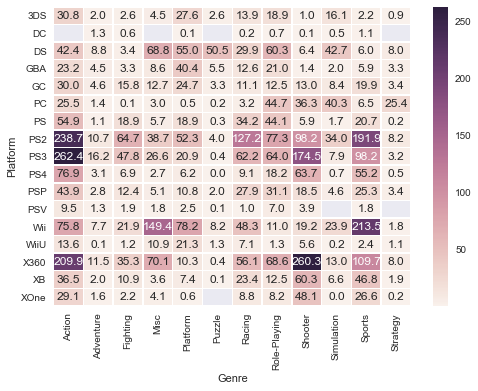

In [14]:
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

# Plotly

Познакомимся также с библиотекой plotly. Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Line plot (go.Scatter)

Динамика числа вышедших игр и их продаж по годам.

Этапы:
* В plotly строится визуализация объекта Figure
* layout: оформление/стиль
* data: массив линий

In [16]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

Global_Sales  Number_of_Games
Year_of_Release                               
1985.0                   0.03                1
1988.0                   0.03                1
1992.0                   0.03                1
1994.0                   1.27                1
1996.0                  20.10                7

In [17]:
# создаем линию для числа проданных копий
trace0 = go.Scatter(x = years_df.index, y = years_df.Global_Sales, name = 'Global_Sales')
trace0

{'name': 'Global_Sales',
 'type': 'scatter',
 'x': Float64Index([1985.0, 1988.0, 1992.0, 1994.0, 1996.0, 1997.0, 1998.0, 1999.0,
               2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
               2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
               2016.0],
              dtype='float64', name='Year_of_Release'),
 'y': Year_of_Release
 1985.0      0.03
 1988.0      0.03
 1992.0      0.03
 1994.0      1.27
 1996.0     20.10
 1997.0     35.01
 1998.0     43.18
 1999.0     51.17
 2000.0     81.24
 2001.0    253.88
 2002.0    288.84
 2003.0    255.35
 2004.0    321.78
 2005.0    334.32
 2006.0    416.72
 2007.0    456.23
 2008.0    489.12
 2009.0    459.85
 2010.0    412.96
 2011.0    383.69
 2012.0    291.93
 2013.0    267.17
 2014.0    192.43
 2015.0    159.16
 2016.0     91.56
 Name: Global_Sales, dtype: float64}

In [18]:
# создаем линию для числа вышедших игр 
trace1 = go.Scatter(x = years_df.index, y = years_df.Number_of_Games, name = 'Number_of_Games')

In [19]:
# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

In [20]:
# визуализация и создание объекта
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В простых случаях можно вызывать функцию iplot и просто от массива traces. Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках.

## bar chart (go.Bar)

Рыночная доля игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке.

In [21]:
# число проданных и выпущенных игр в разрезе платформ
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()).sort_values('Global_Sales', ascending=False)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.head()

Global_Sales  Number_of_Games
Platform                               
PS2             945.97             1140
X360            853.30              858
PS3             784.30              769
Wii             658.98              479
DS              382.33              464

In [22]:
trace0 = go.Bar(x = platforms_df.index, y = platforms_df.Global_Sales, name = 'Global Sales')
trace1 = go.Bar(x = platforms_df.index, y = platforms_df.Number_of_Games, name = 'Number of Games')

In [23]:
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platforms'}}

In [24]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

## Boxplot (go.Box)

Распределение оценок критиков в зависимости от жанра игры.

In [25]:
# Box trace для всех жанров
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
iplot(data, show_link=False)

# Пример визуального анализа

In [26]:
df = pd.read_csv('../data/telecom_churn.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Рассмотрим на распределение оттока

In [28]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

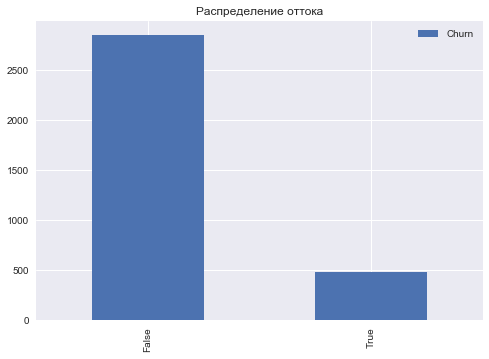

In [29]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока')


Выделим следующие группы признаков (среди всех кроме Churn ):

* бинарные: International plan, Voice mail plan
* категориальные: State
* порядковые: Customer service calls
* количественные: все остальные

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.

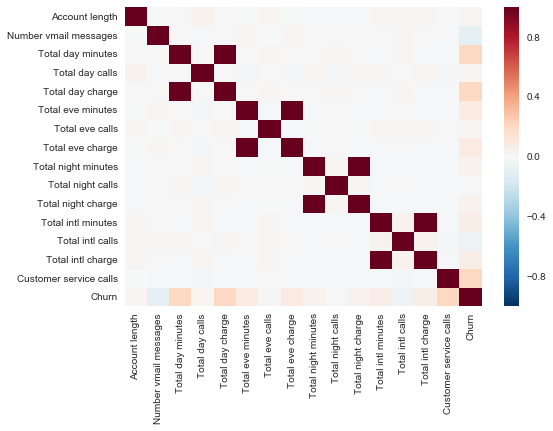

In [30]:
corr_matix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()
sns.heatmap(corr_matix)

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

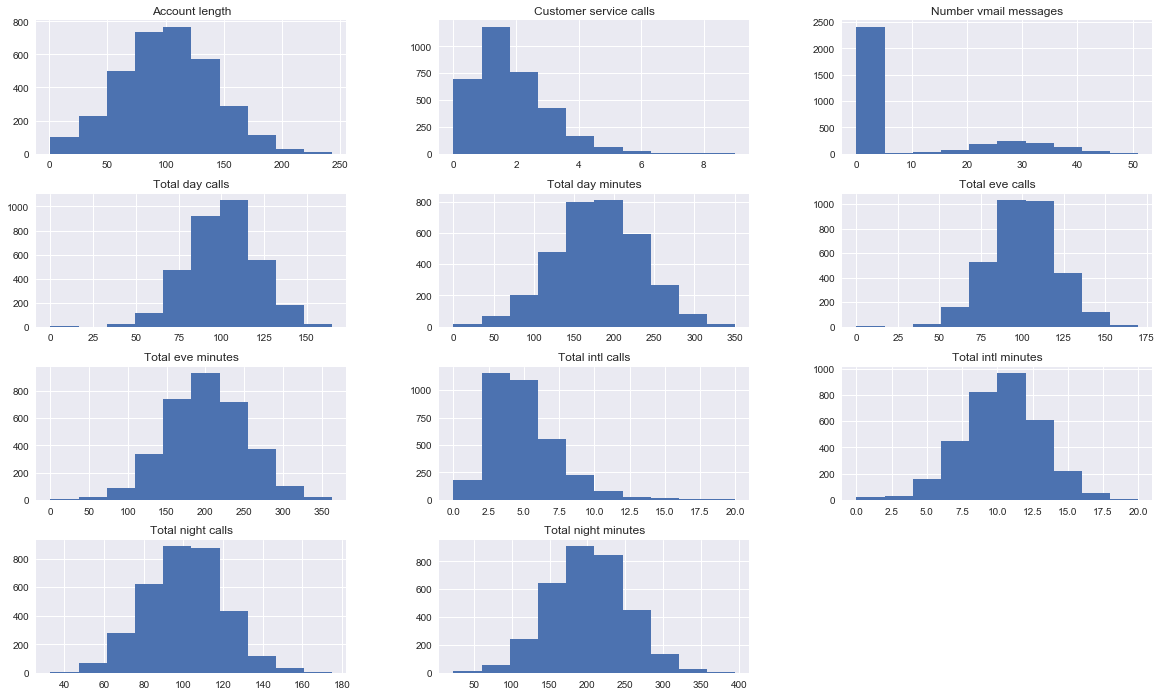

In [31]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (Total intl calls).


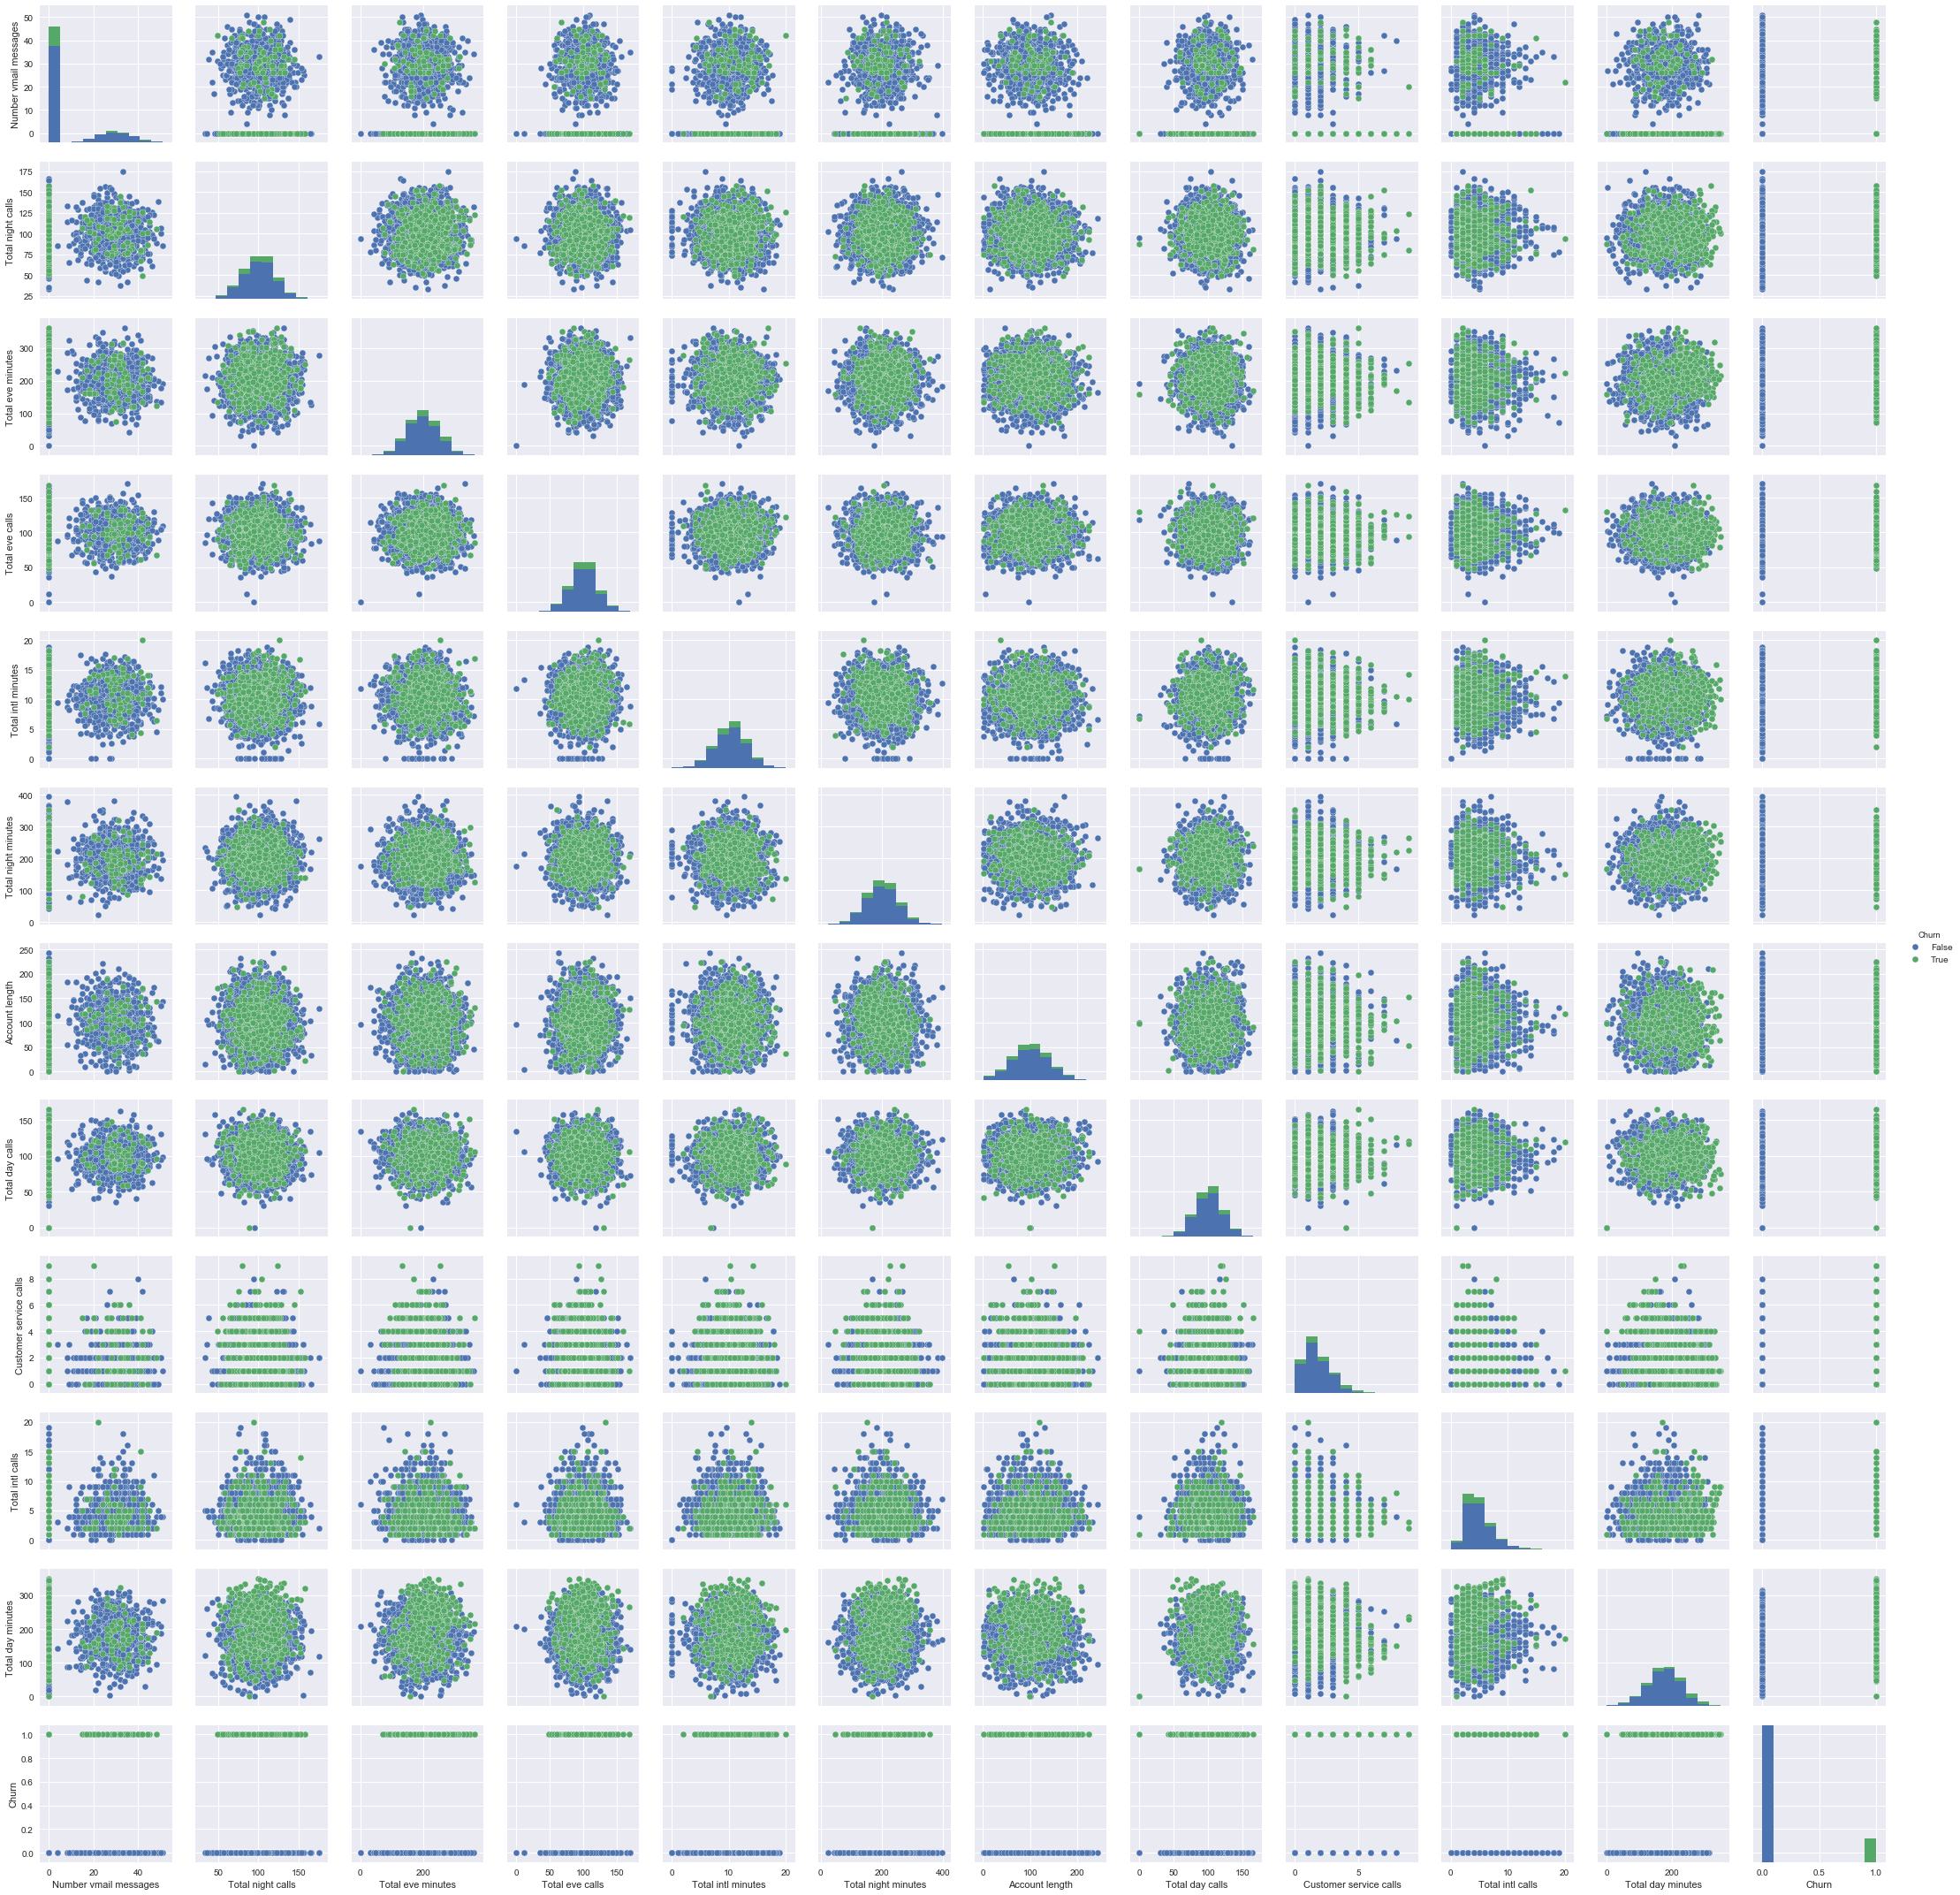

In [32]:
sns.pairplot(df[features + ['Churn']], hue='Churn')

## Связь признаков с оттоком

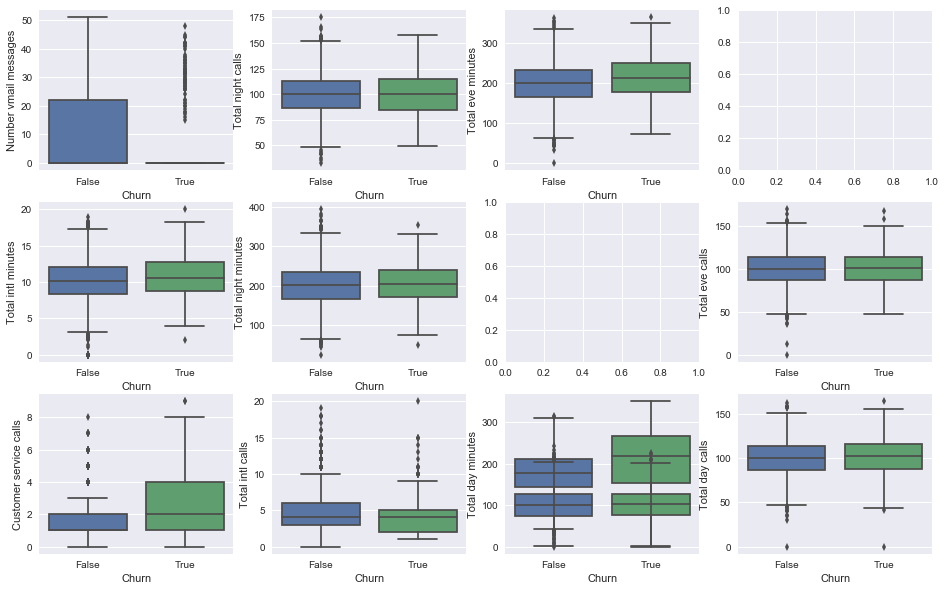

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, feat in enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[round(idx / 4), idx % 4])
    axes[round(idx / 4), idx % 4].legend()
    axes[round(idx / 4), idx % 4].set_xlabel('Churn')
    axes[round(idx / 4), idx % 4].set_ylabel(feat)

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

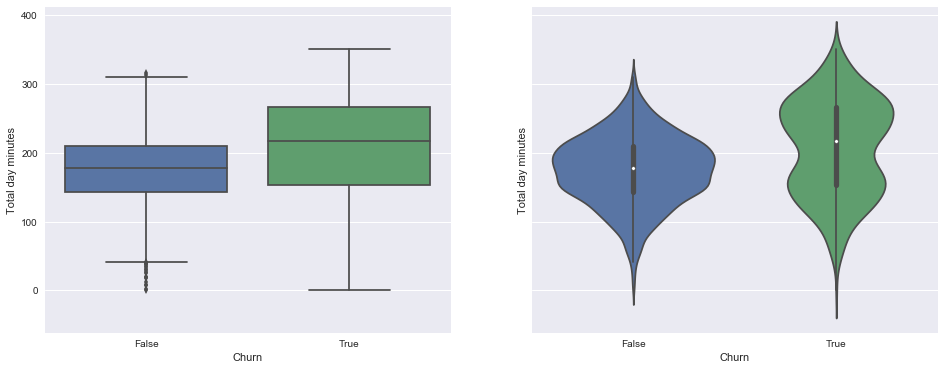

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

Рассмотрим зависимость числа ушедших клиентов от количества обращений в сервисный центр

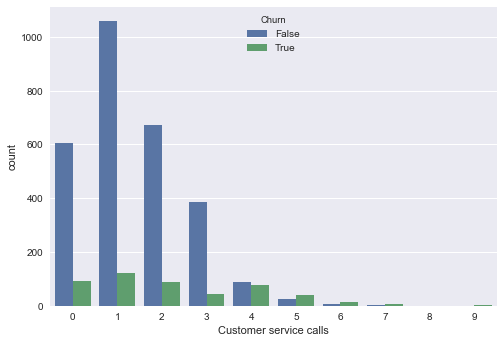

In [35]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак. Про голосовую почту такого нельзя сказать.

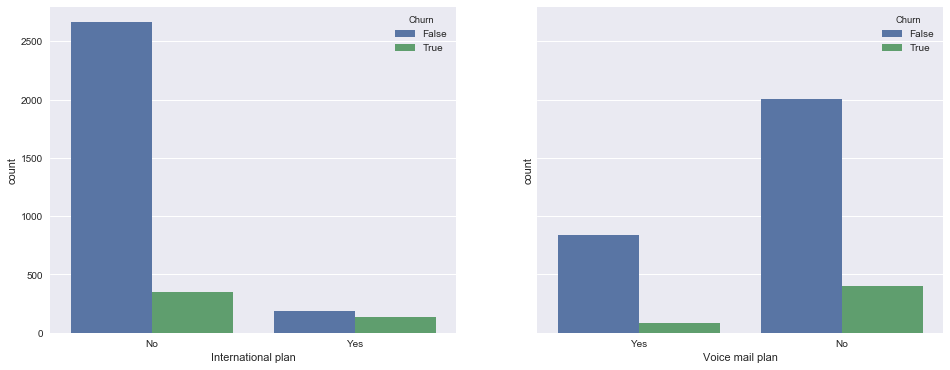

In [36]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 6))
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

In [37]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]


Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%

# t-sne

основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (pd.factorize). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

In [38]:
# преобразуем все признаки в числовые, выкинув штаты

X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                0   
1             107        415                   0                0   
2             137        415                   0                1   
3              84        408                   1                1   
4              75        415                   1                1   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.67648946, -0.52360328, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.52360328, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.52360328, -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ..., 
       [-1.83505538,  1.71881732, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  1.71881732,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.52360328, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [40]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 17.5 s, sys: 2.4 s, total: 19.9 s
Wall time: 20.2 s


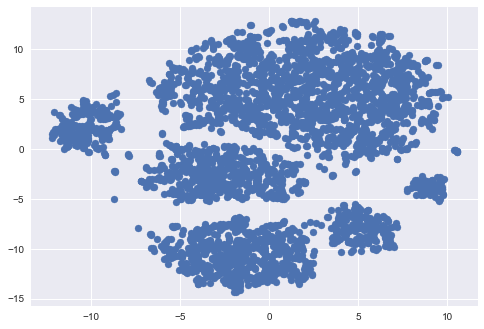

In [41]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

Раскрасим полученное t-SNE представление данных по оттоку (зеленые – лояльные, красные – ушедшие клиенты).

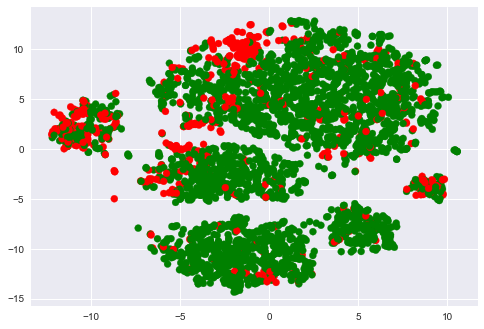

In [42]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({0: 'green', 1: 'red'}))

Чтоб лучше понять картинку, можно также раскрасить ее по остальным бинарным признакам – по роумингу и голосовой почте. Зеленые участки соответствуют объектам, обладающим этим бинарным признаком.


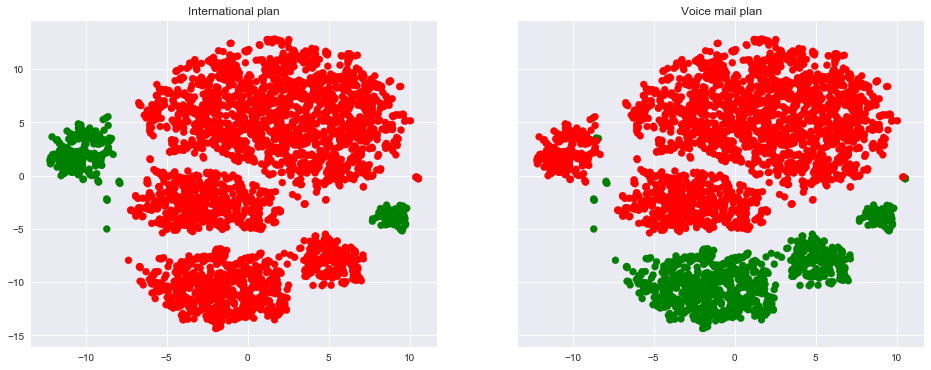

In [43]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'green', 'No': 'red'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'green', 'No': 'red'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');

Теперь понятно, что, например, много ушедших клиентов кучкуется в левом кластере людей с поключенным роумингом, но без голосовой почты.


Напоследок отметим минусы t-SNE (да, по нему тоже лучше писать отдельную статью):

большая вычислительная сложность. Вот эта реализация sklearn скорее всего не поможет в Вашей реальной задаче, на больших выборках стоит посмотреть в сторону Multicore-TSNE;
картинка может сильно поменяться при изменении random seed, это усложняет интерпретацию& Но в целом по таким картинкам не стоит делать далеко идущих выводов – не стоит гадать по кофейной гуще. Иногда что-то бросается в глаза и подтверждается при изучении, но это не часто происходит.